In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [12]:
# Read the data from the CSV file
df = pd.read_csv('/content/data.csv')

# Split the linear_x and angular_z columns as output_data
output_data = df[['linear_x', 'angular_z']]

# Consider the remaining columns as input_data
input_data = df.drop(columns=['linear_x', 'angular_z'])

In [13]:
# Split the data into training and testing sets
train_data, test_data, train_labels, test_labels = train_test_split(input_data, output_data, test_size=0.2)

In [14]:
# Define the model architecture
model = tf.keras.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(5,)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(2))  # Output layer with 2 units

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(train_data, train_labels, epochs=100, batch_size=32, validation_data=(test_data, test_labels))

# Evaluate the model on the test set
loss = model.evaluate(test_data, test_labels)

# Make predictions
predictions = model.predict(test_data)

Epoch 1/100
111/111 [==============================] - 2s 5ms/step - loss: 0.0758 - val_loss: 0.0576
Epoch 2/100
111/111 [==============================] - 0s 3ms/step - loss: 0.0587 - val_loss: 0.0539
Epoch 3/100
111/111 [==============================] - 0s 3ms/step - loss: 0.0514 - val_loss: 0.0504
Epoch 4/100
111/111 [==============================] - 0s 3ms/step - loss: 0.0496 - val_loss: 0.0456
Epoch 5/100
111/111 [==============================] - 0s 3ms/step - loss: 0.0455 - val_loss: 0.0462
Epoch 6/100
111/111 [==============================] - 0s 3ms/step - loss: 0.0448 - val_loss: 0.0423
Epoch 7/100
111/111 [==============================] - 0s 3ms/step - loss: 0.0418 - val_loss: 0.0445
Epoch 8/100
111/111 [==============================] - 0s 3ms/step - loss: 0.0415 - val_loss: 0.0388
Epoch 9/100
111/111 [==============================] - 0s 3ms/step - loss: 0.0405 - val_loss: 0.0395
Epoch 10/100
111/111 [==============================] - 0s 3ms/step - loss: 0.0394 - val_lo

Accuracy plot - Plots True labels vs Prediction labels

28/28 [==============================] - 0s 1ms/step


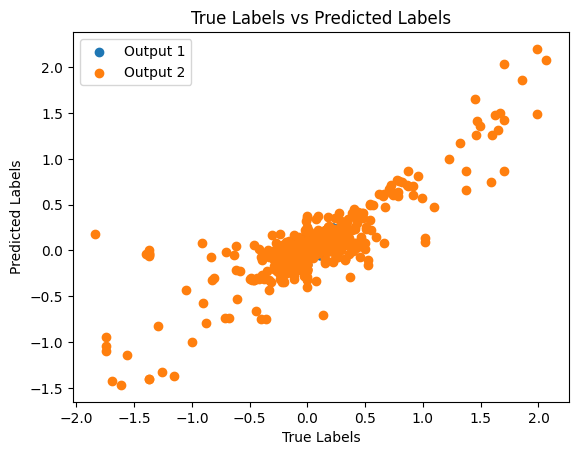

Mean Squared Error Loss: 0.0037


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [10]:
# Make predictions
predictions = model.predict(test_data)

# Extract the individual output variables from the test labels and predictions
true_label_output1 = test_labels.iloc[:, 0]
true_label_output2 = test_labels.iloc[:, 1]
predicted_output1 = predictions[:, 0]
predicted_output2 = predictions[:, 1]

# Plot true labels vs predicted labels
plt.scatter(true_label_output1, predicted_output1, label='Output 1')
plt.scatter(true_label_output2, predicted_output2, label='Output 2')
plt.xlabel('True Labels')
plt.ylabel('Predicted Labels')
plt.legend()
plt.title('True Labels vs Predicted Labels')
plt.show()

# Compute the mean squared error loss
mse_loss = np.mean(np.square(predictions - test_labels))

# Print the loss
print('Mean Squared Error Loss: {:.4f}'.format(mse_loss[0]))

Loss plot - Plots training and validation loss against number of epochs.

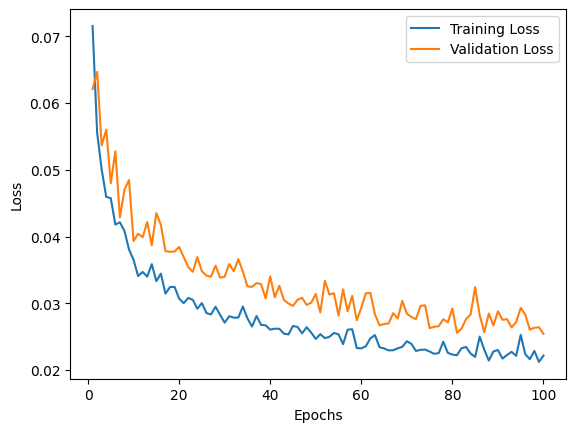

In [11]:
# Get the training loss values from history
training_loss = history.history['loss']
validation_loss = history.history['val_loss']  # Retrieve validation loss

# Plot the loss graph
epochs = range(1, len(training_loss) + 1)
plt.plot(epochs, training_loss, label='Training Loss')
plt.plot(epochs, validation_loss, label='Validation Loss')  # Add validation loss
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
model.save('model.h5')